In [179]:
import pandas as pd

In [180]:
df_ks = pd.read_csv("ks-projects-201801.csv")

In [181]:
df_ks.drop(columns="ID", inplace=True)

In [182]:
df_ks.deadline = pd.to_datetime(df_ks.deadline)
#df_ks.deadline = df_ks.deadline.dt.date
df_ks.launched = pd.to_datetime(df_ks.launched)
#df_ks.launched = df_ks.launched.dt.date

In [183]:
df_ks = df_ks.dropna()

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [185]:
scaler = StandardScaler()
pca = PCA()

In [186]:
df_ks_scale = scaler.fit_transform(df_ks.select_dtypes("number"))

In [187]:
pca_ks=pca.fit_transform(df_ks_scale)
print(pca.explained_variance_ratio_)

[0.57540437 0.32375612 0.06026783 0.02474438 0.00955824 0.00626907]


In [188]:
pc1_ks=[]
pc2_ks=[]
pc3_ks=[]
pc4_ks=[]
pc5_ks=[]
pc6_ks=[]
for i in pca_ks:
    pc1_ks.append(i[0])
    pc2_ks.append(i[1])
    pc3_ks.append(i[2])
    pc4_ks.append(i[3])
    pc5_ks.append(i[4])
    pc6_ks.append(i[5])

In [189]:
df_ks["pc1"]=pc1_ks
df_ks["pc2"]=pc2_ks
df_ks["pc3"]=pc3_ks
df_ks["pc4"]=pc4_ks
df_ks["pc5"]=pc5_ks
df_ks["pc6"]=pc6_ks

In [190]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

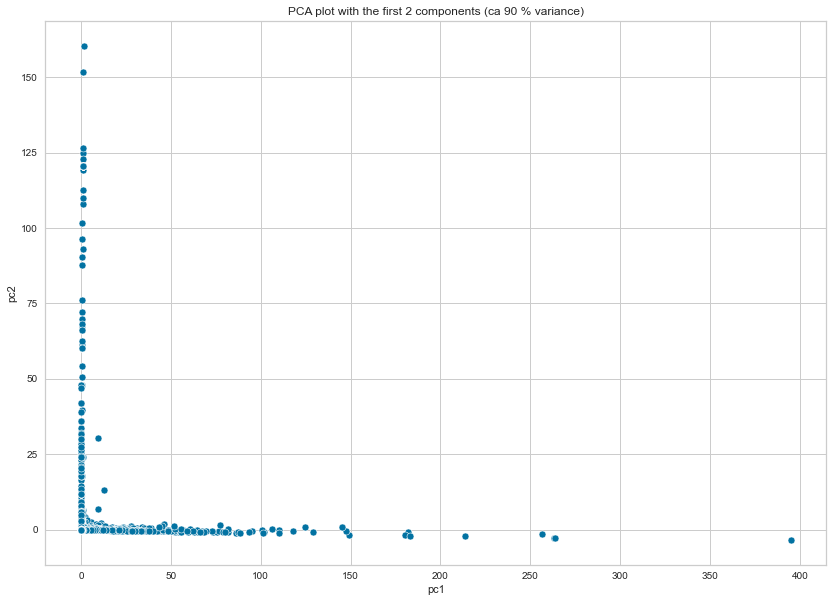

In [191]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_ks, x="pc1", y="pc2")
plt.title("PCA plot with the first 2 components (ca 90 % variance)")
plt.show()

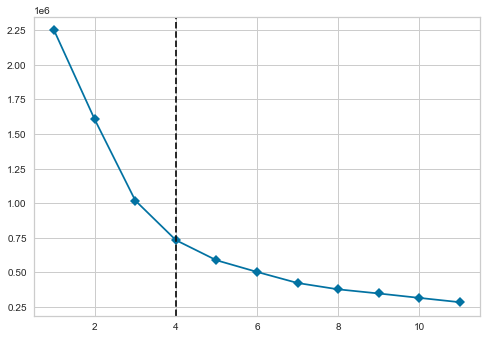

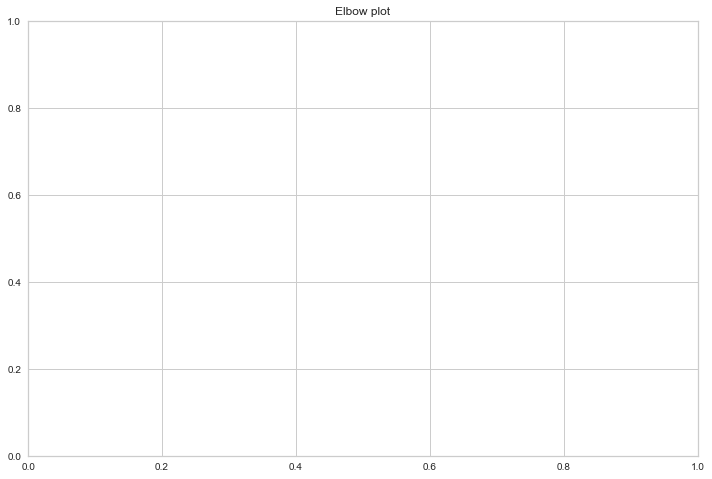

In [192]:
# 3, 4
elbow_viz = KElbowVisualizer(KMeans(), k=(1, 12), timings=False)
elbow_viz.fit(df_ks_scale)
plt.figure(figsize=(12, 8))
plt.title("Elbow plot")
plt.show()

# 3 clusters

In [193]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_ks_scale)

KMeans(n_clusters=3)

In [194]:
df_ks["clusters"] = kmeans.labels_

In [195]:
df_ks_scale = pd.DataFrame(df_ks_scale, columns=['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'])

df_ks_scale["clusters"] = kmeans.labels_

In [196]:
df_ks.clusters.value_counts()

0    374717
1        74
2        69
Name: clusters, dtype: int64

In [197]:
df_ks.clusters.loc[df_ks.clusters == 0] = "The not-so-interesting"
df_ks.clusters.loc[df_ks.clusters == 2] = "High Profile"
df_ks.clusters.loc[df_ks.clusters == 1] = "The Overly Ambitious"
df_ks_scale.clusters.loc[df_ks_scale.clusters == 0] = "The not-so-interesting"
df_ks_scale.clusters.loc[df_ks_scale.clusters == 2] = "High Profile"
df_ks_scale.clusters.loc[df_ks_scale.clusters == 1] = "The Overly Ambitious"

C:\Users\kebbe\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kebbe\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [198]:
df_ks.groupby("clusters").mean()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pc1,pc2,pc3,pc4,pc5,pc6
clusters,,,,,,,,,,,,
High Profile,7.873947e+07,8.085046e+02,4.318841,8.248380e+02,8.247910e+02,7.440360e+07,0.748119,92.155324,0.034568,0.012163,1.403685,-0.126234
The Overly Ambitious,3.810529e+05,4.574183e+06,39799.770270,3.603355e+06,4.524749e+06,3.842406e+05,93.214714,-0.542921,1.354314,0.784920,-0.066470,-0.746900
The not-so-interesting,3.496763e+04,8.850790e+03,98.868533,6.327737e+03,8.230669e+03,3.210405e+04,-0.018546,-0.016862,-0.000274,-0.000157,-0.000245,0.000171


In [199]:
df_ks_scale.groupby("clusters").mean()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
clusters,,,,,,
High Profile,66.161588,-0.093136,-0.112283,-0.078992,-0.090847,64.169771
The Overly Ambitious,0.278746,47.540819,43.537012,45.731383,49.448630,0.292016
The not-so-interesting,-0.012238,-0.009371,-0.008577,-0.009017,-0.009749,-0.011874


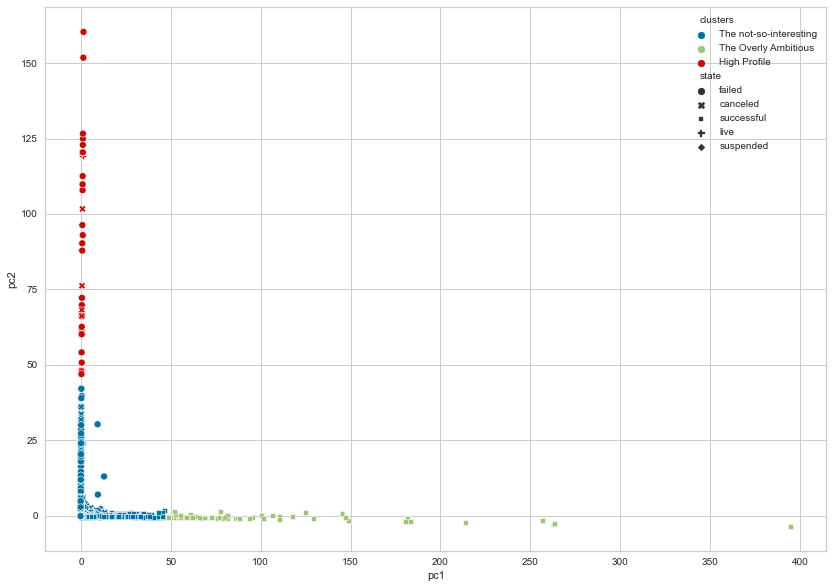

In [200]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_ks, x="pc1", y="pc2", hue="clusters", style="state")
plt.show()

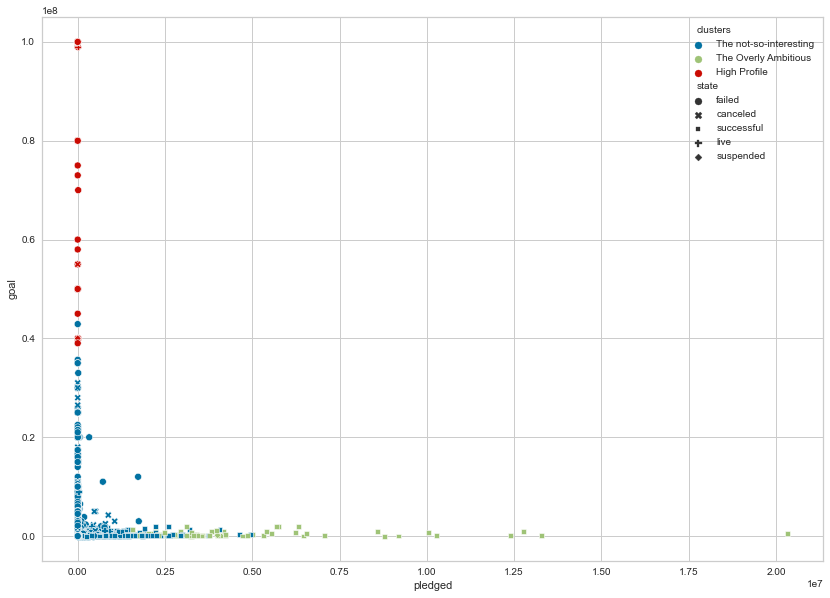

In [201]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_ks, x="pledged", y="goal", hue="clusters", style="state")
plt.show()

In [202]:
df_ks_3 = df_ks.loc[df_ks.clusters == "The not-so-interesting"]

In [203]:
lab =list(df_ks_1.groupby("category", as_index=False).count()[["category", "name"]].sort_values(by="name", ascending=False).category)

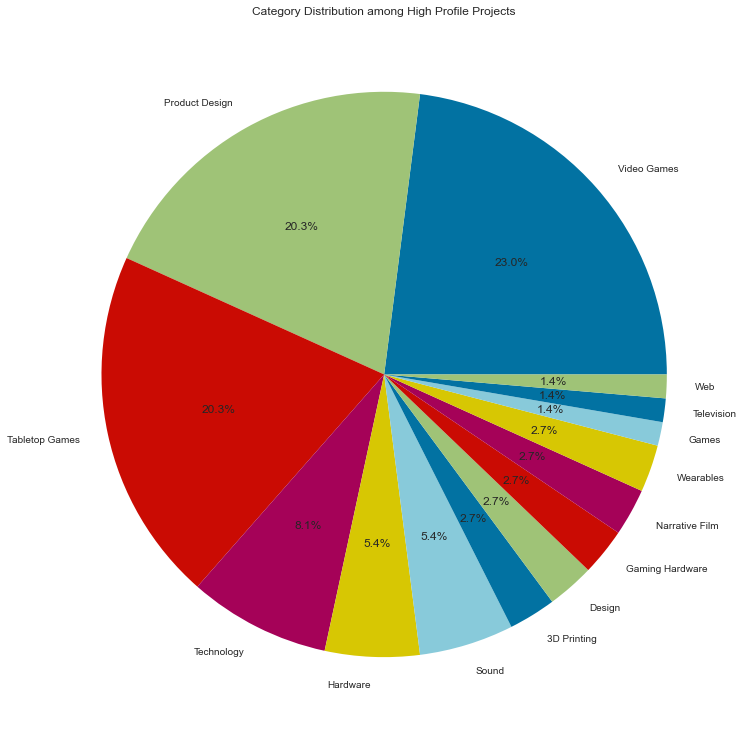

In [204]:
ma_plot = df_ks_1.groupby("category", as_index=False).count()[["category", "name"]].sort_values(by="name", ascending=False).plot.pie(y="name", autopct="%1.1f%%", figsize=(17,13), labels=lab)
ma_plot.set(ylabel="")
plt.legend("")
plt.title("Category Distribution among High Profile Projects")
plt.show()

In [205]:
df_ks_2[["name", "backers"]].name.head(15)

23469      Help me start a fair media company, Trump Media
33084             Sage: Warrior Of The Fallen Gods (Movie)
35591                                             Justyn's
35786                      The Best Kickstarter Video Ever
44806                             The Life of Alfred Nobel
47803            FUCK Potato Salad. Paleo Potato Brownies!
55009                  Kybernan Holographic Gaming Network
63125                                               Mirror
72095                          One big fat fireworks show!
72775                                      Art Is Fabulous
72990                                            Wax Apple
77676                                   Bring back Pontiac
82490    Movie Sweepstakes Challenge (Feature Film for ...
83297           The Cultivator Episode 1 Lord Of The Gorgs
94636                     Survival SandBox Game (Canceled)
Name: name, dtype: object

In [206]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_ks_3, x="name", y="pledged")
#sns.lineplot(data=df_ks_3, x=range(len(df_ks_3)), y="pledged")
plt.xticks("")
plt.xlabel("")
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F8DA133E50> (for post_execute):


KeyboardInterrupt: 

# Misc

In [109]:
yrs=[]
for i in range(len(df_ks.groupby([df_ks.launched.dt.year, df_ks.launched.dt.month]).count().iloc[1:, :].index)):
    yrs.append(df_ks.groupby([df_ks.launched.dt.year, df_ks.launched.dt.month]).count().iloc[1:, :].index[i][0])

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_ks.groupby([df_ks.launched.dt.year, df_ks.launched.dt.month]).count().iloc[1:, :], x=yrs, y="name")
plt.title("Amount of KS projects launched per year")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_ks.groupby("category", as_index=False).count().sort_values(by="name").head(), x="name", y="category")
plt.title("Least common categories")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_ks[["name", "usd pledged"]].sort_values(by="usd pledged", ascending=False).head(), x="usd pledged", y="name")
plt.title("Most pledged to project [USD]")
plt.xlabel("USD")
plt.ylabel("Name")
plt.show()

# 4 clusters

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_ks_scale)

In [ ]:
df_ks["clusters"] = kmeans.labels_

In [ ]:
df_ks_scale = pd.DataFrame(df_ks_scale, columns=['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'])

df_ks_scale["clusters"] = kmeans.labels_

In [ ]:
df_ks.clusters.value_counts()

In [ ]:
df_ks.groupby("clusters").mean()

In [ ]:
df_ks_scale.groupby("clusters").mean()

In [ ]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_ks, x="pc1", y="pc2", hue="clusters")
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))
sns.pairplot(df_ks, hue = "clusters")
plt.show()

# 5 clusters

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_ks_scale)

In [ ]:
df_ks["clusters"] = kmeans.labels_

In [ ]:
df_ks_scale = pd.DataFrame(df_ks_scale, columns=['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'])

df_ks_scale["clusters"] = kmeans.labels_

In [ ]:
df_ks.clusters.value_counts()

In [ ]:
df_ks.groupby("clusters").mean()

In [ ]:
df_ks_scale.groupby("clusters").mean()

In [ ]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_ks, x="pc1", y="pc2", hue="clusters")
plt.show()